In [177]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder,QuantileTransformer, Imputer
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import grid_search
from sklearn.model_selection import cross_val_score
import sklearn.cross_validation as cv
import seaborn as sns
import matplotlib
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [178]:
#Load Data

df = pd.read_csv('train_clean.csv')
df = df.drop(df.columns[0], axis=1)
tf = pd.read_csv('test_clean.csv')
tf = tf.drop(tf.columns[0], axis=1)



In [179]:
#Separate X_train y_train and y_test
y_train = df['SalesPrice']
X_train = df.drop('SalesPrice', axis=1)
X_test = tf.copy()

del df,tf


In [180]:
# Trying Random Forest Regression Model
Model_Random_Forest = RandomForestRegressor(n_estimators=100)

In [181]:
Model_Random_Forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [182]:
kf = cv.KFold(1460, n_folds=10, shuffle=True)

In [183]:
scores = cv.cross_val_score(Model_Random_Forest, X_train, y_train, cv=10)
print(scores, ' and the mean score is = ', scores.mean())

[ 0.83932252  0.90919543  0.89367289  0.89085487  0.86472873  0.88351283
  0.87394331  0.88706045  0.90415393  0.85179823]  and the mean score is =  0.879824317297


In [184]:
#Feature Importance Comparison
feature_importance = Model_Random_Forest.feature_importances_
feature_importance

array([  5.55289153e-03,   2.92277646e-03,   1.12078150e-04,
         3.10261605e-04,   1.13571016e-03,   5.32883971e-04,
         1.48442188e-03,   1.10006884e-02,   2.99041277e-04,
         2.69080599e-03,   4.88076207e-04,   7.49570186e-04,
         1.25593936e-04,   3.39494206e-03,   7.45873566e-03,
         1.67881877e-02,   1.83012116e-03,   8.57008481e-04,
         1.36719664e-03,   5.89894565e-04,   1.05939056e-03,
         3.40447661e-03,   1.15863768e-03,   1.58515213e-03,
         1.10688670e-02,   1.36751343e-02,   1.07015257e-03,
         1.73027595e-03,   1.79790298e-03,   7.32318417e-03,
         1.26075416e-02,   6.35010698e-04,   1.00552604e-03,
         1.29590478e-03,   3.98147399e-03,   4.49367737e-04,
         1.06271519e-02,   4.81655436e-03,   1.48302669e-03,
         5.46785293e-05,   1.65280732e-03,   1.90182104e-03,
         1.04264884e-04,   3.14483695e-03,   3.00539242e-03,
         9.61572240e-03,   4.33740966e-01,   1.24235643e-03,
         8.18939833e-06,

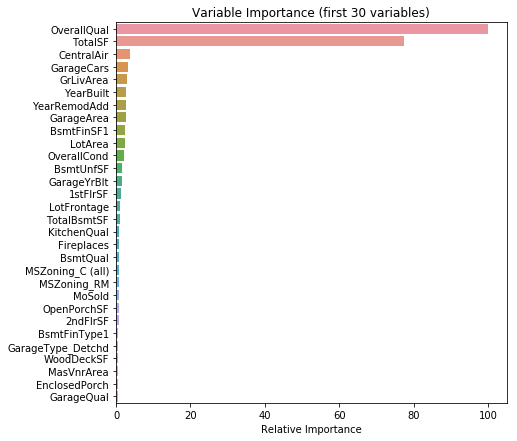

In [185]:
# features relative importance: comparing feature importance with respect to the most important one

feature_importance = 100 * (feature_importance / feature_importance.max())
sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = X_train.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 30 #To limit the number of features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp)
plt.xlabel('Relative Importance')
plt.title('Variable Importance (first {0} variables)'.format(c))
plt.show()

In [186]:
#Comparing the scores of different Regression models: RandomForest, Bagging,ExtraTrees, AdaBoost,
# Gradient Boosting
def check_classifiers(X, y):
    """
    Returns a sorted list of accuracy scores from fitting and scoring passed data
    against several algorithms.
    """
    params = 100
    _cv = kf
    classifier_score = {}
    
    scores = cv.cross_val_score(RandomForestRegressor(n_estimators=params), X, y, cv=10)
    RandomForestRegressor_Score=classifier_score['Random Forest Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(BaggingRegressor(n_estimators=params), X, y, cv=10)
    BaggingRegressor_Score = classifier_score['Bagging Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(ExtraTreesRegressor(n_estimators=params), X, y, cv=10)
    ExtraTreesRegressor_Score =classifier_score['ExtraTrees Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(AdaBoostRegressor(n_estimators=params), X, y, cv=10)
    AdaBoostRegressor_Score =classifier_score['AdaBoost Regressor'] = scores.mean()
    
    scores = cv.cross_val_score(GradientBoostingRegressor(n_estimators=params), X, y, cv=10)
    GradientBoostingRegressor_Score =classifier_score['Gradient Boost Regressor'] = scores.mean()

    #return sorted(classifier_score.items(), key=operator.itemgetter(1), reverse=True)
    return sorted(classifier_score.items(), reverse=True)

check_classifiers(X_train, y_train)

[('Random Forest Regressor', 0.88291345981114255),
 ('Gradient Boost Regressor', 0.90374987899143344),
 ('ExtraTrees Regressor', 0.8982422196665214),
 ('Bagging Regressor', 0.88138692887517378),
 ('AdaBoost Regressor', 0.81701211770958015)]

In [190]:
Scores=(0.88194611067038353,0.90422740268727764,0.8986087127226039,0.88156744902403439,0.81607254465413137)
Scores_PeakVal=('0.88194611067038353','0.90422740268727764','0.8986087127226039','0.88156744902403439','0.81607254465413137')
error =(1-0.88194611067038353,1-0.90422740268727764,1-0.8986087127226039,1-0.88156744902403439,1-0.81607254465413137)
#error_PeakVal =(1-0.88194611067038353,1-0.90422740268727764,1-0.8986087127226039,1-0.88156744902403439,1-0.81607254465413137)
print(error_PeakVal)

(0.11805388932961647, 0.09577259731272236, 0.1013912872773961, 0.11843255097596561, 0.18392745534586863)


0.88194611067
0.904227402687
0.898608712723
0.881567449024
0.816072544654
0.11805388933
0.0957725973127
0.101391287277
0.118432550976
0.183927455346


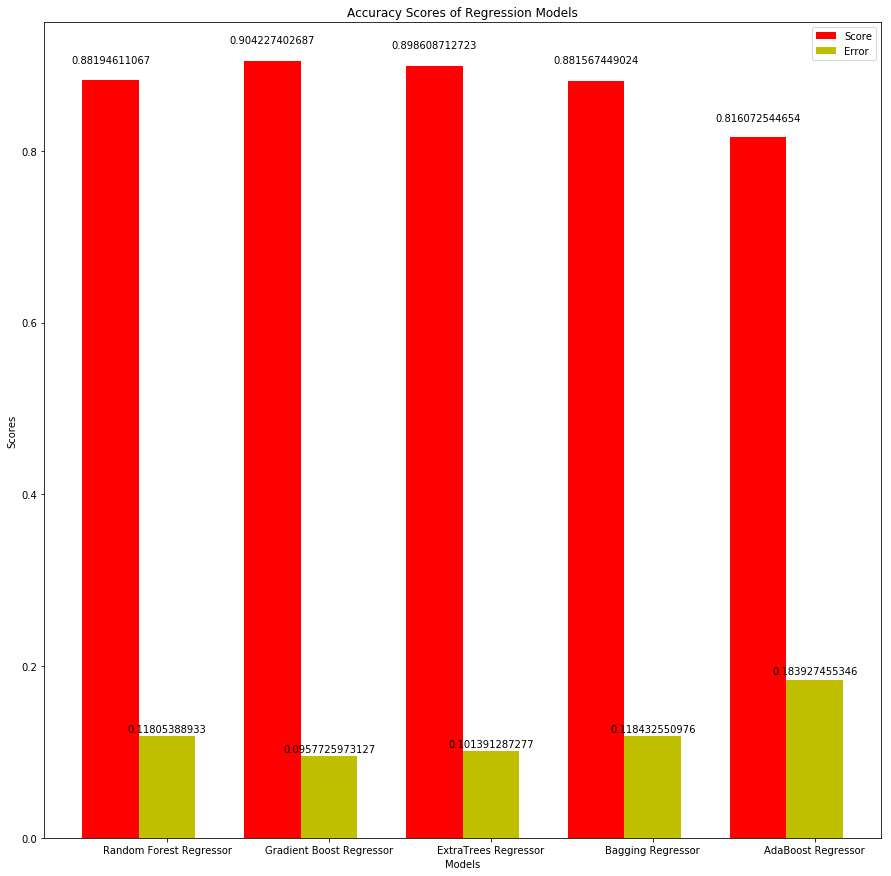

In [204]:
N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


plt.subplot(111)
rects1 = plt.bar(ind, Scores, width,
                    color='r',
                    error_kw=dict(elinewidth=6, ecolor='pink'))

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = plt.bar(ind+width, error, width,
                    color='y',
                    error_kw=dict(elinewidth=6, ecolor='yellow'))


plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy Scores of Regression Models')
plt.xticks(ind + width, ('Random Forest Regressor', 'Gradient Boost Regressor', 'ExtraTrees Regressor', 'Bagging Regressor','AdaBoost Regressor'))


plt.legend( (rects1[0], rects2[0]), ('Score', 'Error') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        print(height)
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height,height,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


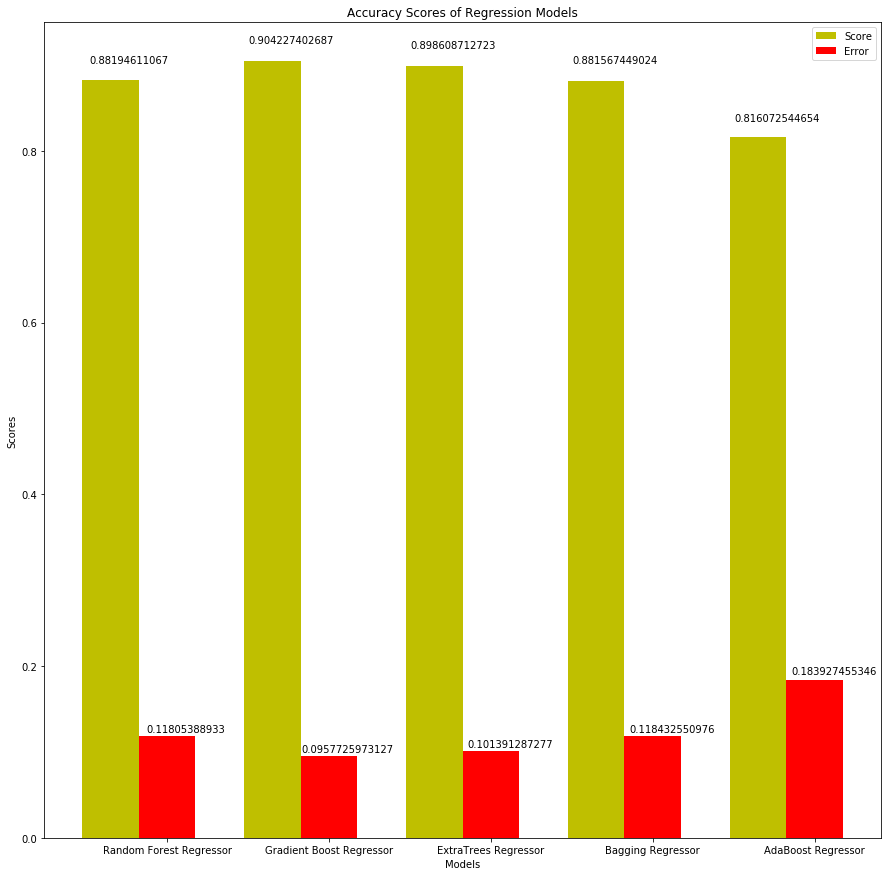

In [213]:
n_groups = 5
index = np.arange(n_groups)
rects1 = plt.bar(index,Scores, bar_width,
                 color='y',
                 label='Score')
 
rects2 = plt.bar(index + bar_width, error, bar_width,
                 color='r',
                 label='Error')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/1.2, 1.02*height,
                 height,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] =15
#fig_size[1] =15
#plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy Scores of Regression Models')
plt.xticks(index + bar_width, ('Random Forest Regressor', 'Gradient Boost Regressor', 'ExtraTrees Regressor', 'Bagging Regressor','AdaBoost Regressor'))
plt.legend()
#plt.figure()


plt.show()

In [217]:
# Determine ‘optimal’ number of components
# I modified this frequently and it took alot of time for each iteration.. but at the end I chose
# the ranges that gives the lowest neg_mean_square_error.
model_GradientBoostingRegression = GradientBoostingRegressor()

gs = grid_search.GridSearchCV(
    estimator=model_GradientBoostingRegression,
    param_grid={'loss': ['ls', 'huber'],
                'learning_rate': [0.001],
                'n_estimators': np.arange(1000,10000,1000),
                'max_depth': [2]
                },
    scoring='neg_mean_squared_error',
    cv=10
    )

gs.fit(X_train, y_train)


gs.grid_scores_

[mean: -0.05845, std: 0.01018, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 1000},
 mean: -0.03391, std: 0.00643, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 2000},
 mean: -0.02537, std: 0.00469, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 3000},
 mean: -0.02158, std: 0.00379, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 4000},
 mean: -0.01949, std: 0.00345, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 5000},
 mean: -0.01802, std: 0.00341, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 6000},
 mean: -0.01699, std: 0.00341, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 7000},
 mean: -0.01625, std: 0.00343, params: {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 8000},
 mean: -0.01570, std: 0.00344, params: {'learning_rate': 0.001, 

In [219]:
print('Lowest mean squared error = ', gs.best_score_)

gs.best_estimator_

Lowest mean squared error =  -0.01569796683067457


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=9000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [111]:
from math import sqrt
sqrt(-gs.best_score_)

0.11386977832420478

In [245]:
# Depending on the Classifier scores.. Gradient Boosting was chosen.4 gradient boosting models
#were created
#HyperParameter Tuning for Gradient Boosting Regression
model_GradientBoostingRegression = GradientBoostingRegressor()

gs = grid_search.GridSearchCV(
    estimator=model_GradientBoostingRegression,
    param_grid={'loss': ['huber'],
                'learning_rate': [0.0048],
                'n_estimators': [14800],
                'max_depth': [3]
                },
    scoring='neg_mean_squared_error',
    cv=10
    )

gs.fit(X_train, y_train)


gs.grid_scores_

[mean: -0.01411, std: 0.00394, params: {'learning_rate': 0.0048, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 14800}]

In [6]:
# GradientBoosting Regression Model1 with the right parameters 
Model_GradientBoostingRegression_1= GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=2, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [7]:
Model_GradientBoostingRegression_2 = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=1, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [8]:
Model_GradientBoostingRegression_3 = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_3.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [9]:
Model_GradientBoostingRegression_4 = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.0048, loss='huber',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Model_GradientBoostingRegression_4.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0048, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=14800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [21]:
scores = cv.cross_val_score(Model_GradientBoostingRegression_1, X_train, y_train, cv=10)
scores.mean()
scores = cv.cross_val_score(Model_GradientBoostingRegression_2, X_train, y_train, cv=10)
scores.mean()
scores = cv.cross_val_score(Model_GradientBoostingRegression_3, X_train, y_train, cv=10)
scores.mean()
scores = cv.cross_val_score(Model_GradientBoostingRegression_4, X_train, y_train, cv=10)
scores.mean()

KeyboardInterrupt: 

In [10]:
y_predict1_GradientBoostingRegression = Model_GradientBoostingRegression_1.predict(X_test)
print(y_predict1_GradientBoostingRegression)
y_predict2_GradientBoostingRegression = Model_GradientBoostingRegression_2.predict(X_test)
print(y_predict2_GradientBoostingRegression)
y_predict3_GradientBoostingRegression = Model_GradientBoostingRegression_3.predict(X_test)
print(y_predict3_GradientBoostingRegression)
y_predict4_GradientBoostingRegression = Model_GradientBoostingRegression_4.predict(X_test)
print(y_predict4_GradientBoostingRegression)

[ 11.71573112  12.02268514  12.16057291 ...,  11.95383077  11.66961236
  12.28701467]
[ 11.71128868  12.00165215  12.17846699 ...,  12.1130437   11.70864665
  12.33930739]
[ 11.76219886  12.03170436  12.17618708 ...,  11.97590181  11.63754807
  12.33534173]
[ 11.76662884  12.0343554   12.14747986 ...,  11.93345225  11.64706921
  12.33240002]


In [11]:
#y_test
y1_Gradient = np.exp(y_predict1_GradientBoostingRegression)
print(y1_Gradient)
y2_Gradient = np.exp(y_predict2_GradientBoostingRegression)
print(y2_Gradient)
y3_Gradient = np.exp(y_predict3_GradientBoostingRegression)
print(y3_Gradient)
y4_Gradient = np.exp(y_predict4_GradientBoostingRegression)
print(y4_Gradient)


[ 122483.44026352  166489.1034437   191103.97041622 ...,  155411.35267332
  116962.93440864  216861.60671169]
[ 121940.52149466  163023.90898248  194554.37887591 ...,  182233.42562695
  121618.77627628  228503.63220489]
[ 128309.27730868  167997.49792228  194111.31924516 ...,  158879.57592616
  113272.08886597  227599.26054486]
[ 128878.94656306  168443.45676216  188618.14564805 ...,  152276.35142304
  114355.71860106  226930.71304558]


In [110]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train,y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [13]:
model_ridge = Ridge()

gs = grid_search.GridSearchCV(
    estimator=model_ridge,
    param_grid={'alpha':[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]},
    scoring='neg_mean_squared_error',
    cv=10
    )

gs.fit(X_train, y_train)


gs.grid_scores_

[mean: -0.01459, std: 0.00417, params: {'alpha': 0.05},
 mean: -0.01445, std: 0.00414, params: {'alpha': 0.1},
 mean: -0.01410, std: 0.00405, params: {'alpha': 0.3},
 mean: -0.01357, std: 0.00387, params: {'alpha': 1},
 mean: -0.01312, std: 0.00361, params: {'alpha': 3},
 mean: -0.01299, std: 0.00348, params: {'alpha': 5},
 mean: -0.01297, std: 0.00329, params: {'alpha': 10},
 mean: -0.01308, std: 0.00319, params: {'alpha': 15},
 mean: -0.01358, std: 0.00302, params: {'alpha': 30},
 mean: -0.01429, std: 0.00289, params: {'alpha': 50},
 mean: -0.01511, std: 0.00280, params: {'alpha': 75}]

In [14]:
from math import sqrt
sqrt(-gs.best_score_)

0.11386977832420478

In [15]:
#Model_Ridge
model_ridge = Ridge(alpha = 10)

In [16]:
model_ridge =RidgeCV().fit(X_train,y_train)
ridge_preds =np.expm1(model_ridge.predict(X_test))


In [86]:
#Model_Lasso
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
print(rmse_cv(model_lasso))
rmse_cv(model_lasso).mean()
#model_lasso.alpha_

[ 0.10524831  0.11627766  0.12700789  0.10852312  0.11006423]


0.11342424408311473

In [87]:

#model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=0)).fit(X_train, y_train)

#score = rmse_cv(model_lasso).mean()
#score

In [88]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [89]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 95 variables and eliminated the other 125 variables


In [92]:
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [94]:
lasso_preds

array([ 121399.68297285,  157985.65254428,  183645.11283799, ...,
        174811.90512721,  113306.9967582 ,  227383.07501768])

In [96]:
ensemble = ((lasso_preds +  ridge_preds)/2 + (y1_Gradient+y2_Gradient)/2)/2

In [97]:
print(y1_Gradient)
print(y2_Gradient)
y3_Gradient
ensemble

[ 122483.44026352  166489.1034437   191103.97041622 ...,  155411.35267332
  116962.93440864  216861.60671169]
[ 121940.52149466  163023.90898248  194554.37887591 ...,  182233.42562695
  121618.77627628  228503.63220489]


array([ 121307.89861076,  161124.65150368,  188615.14915951, ...,
        172187.22979351,  116996.82084315,  223579.61193878])

In [98]:
Submission = pd.DataFrame({'Id':list(range(1461,2920,1)),'SalePrice':ensemble})
Submission.to_csv('Trial.csv', index=False)